# 2.0. 
A parachutist of mass $60$ $kg$ jumps out of the stationary air baloon. The upward drag force due to air resistance is proportional to the square of velocity

$$F_D=-bv^2$$

where $b$ is a drag coefficient $(kg/m)$. The drag coefficient is $b=0.2$ $kg/m$.

## 2.1.
According to Newton's second law the formula for the total force acting on the parachutist will be:

$$ma=mg-bv^2$$

$$a=\frac{mg-bv^2}{m}$$

$$\frac{\partial v}{\partial t}=\frac{mg-bv^2}{m}=g-\frac{bv^2}{m}     \qquad   (2.1)$$

## 2.2.
Solution of the equation (2.1):

$$\int\frac{\partial v}{g-\frac{bv^2}{m}}=\int\partial t$$


$$v(t)=\frac{\sqrt{g}\thinspace(1-e^{-2t\sqrt{\frac{gb}{m}}})}{\thinspace(e^{-2t\sqrt{\frac{gb}{m}}}+1)\sqrt{\frac{b}{m}}} \qquad (2.2)$$ 

## 2.3.
Terminal velocity is obtained assuming $t$ is too large:

$$v_T=\sqrt{\frac{gm}{b}}$$

Inserting parameters leads to:

$$v_T=\sqrt{\frac{9.8\cdot60}{0.2}}=54.22m/s \qquad (2.3)$$ 

In [2]:
# 2.4.
import math
import numpy as np
import math
g=9.8
def v_D(t):
    v_D=(g**0.5*(1-np.exp(-2*t*(0.2*g/60)**0.5)))/((0.2/60)**0.5*(1+np.exp(-2*t*(0.2*g/60)**0.5)))
    return v_D
def v_T(t):
    v_T=(g*60/0.2)**0.5 
    return v_T

import matplotlib.pyplot as plt
t =np.arange(0,20,0.1) 
plt.figure(figsize=(10, 10))
plt.xlim(0,20)
plt.ylim(0,60)
plt.plot(t,v_D(t), label='Velocity')
plt.hlines((g*60/0.2)**0.5,min(t),max(t),linestyles='dashed', label='Terminal velocity')
plt.xlabel(r'$t$, s',size=20)
plt.ylabel(r'$\upsilon$, m/s',size=20)
plt.title('Velocity considering drag force versus time', fontsize='20')
plt.legend(loc='lower right', fontsize='20')
plt.grid()
plt.show()
    

<Figure size 1000x1000 with 1 Axes>

# 2.5.

An equation for time is got during the derivation of 2.2:
    $$\sqrt{\frac{m}{b}}\frac{1}{2\sqrt{g}}\ln\frac{\sqrt{g}+\sqrt{\frac{b}{m}}v}{\sqrt{g}-\sqrt{\frac{b}{m}}v}=t$$

In [21]:
# 2.5.
import math
t=round(((60/0.2)**(0.5)*(1/(2*(g)**0.5))*math.log((g**(0.5)+(g)**(0.5)*0.95)/((g**(0.5)-(g)**(0.5)*0.95)))),2)
print(f'The time required for reaching 95% of terminal velocity is {t}s')

The time required for reaching 95% of terminal velocity is 10.13s


# 2.6

$$\frac{v(t_{i+1})-v(t_i)}{t_{i+1}-t_i}=g-\frac{bv^2(t_i)}{m} \qquad (2.6)$$


In [36]:
# 2.7.

t =np.arange(0,100,1)
t1 =np.arange(0,50,0.1)
def v_num(t):
    v_n=[]
    v_old=0
    t_new=0
    s=t[1]-t[0]
    for i in range(0,len(t)):
        if(i==len(t)-1):
            v_new=v_old+(g-0.2*v_old**2/60)*(s)
        else:
            v_new=v_old+(g-0.2*v_old**2/60)*(t_new)
            t_new=t[i+1]-t[i]
        v_old=v_new
        v_n.append(v_new)
    
    return np.array(v_n)


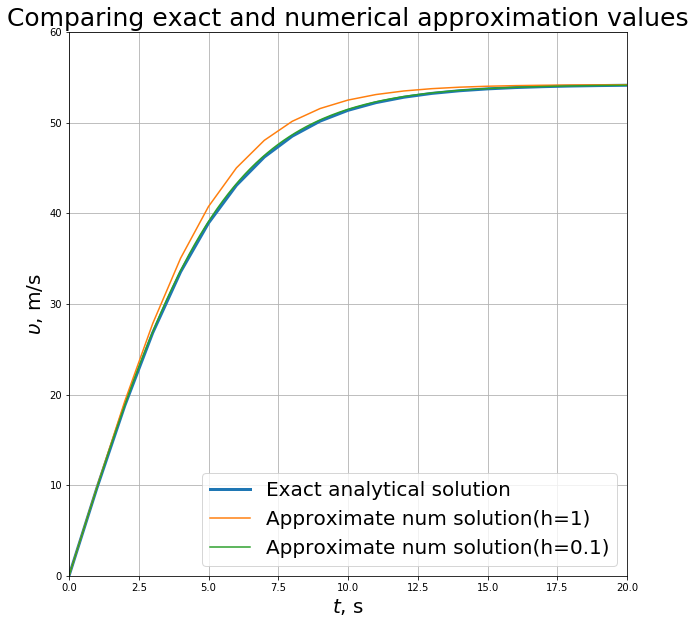

In [35]:
#2.8
plt.figure(figsize=(10, 10))
plt.grid()
plt.xlim(0,20)
plt.ylim(0,60)
plt.plot(t,v_D(t), label='Exact analytical solution', linewidth='3')
plt.plot(t,v_num(t), label='Approximate num solution(h=1)')
plt.plot(t1,v_num(t1), label='Approximate num solution(h=0.1)')
plt.xlabel(r'$t$, s',size=20)
plt.ylabel(r'$\upsilon$, m/s',size=20)
plt.title('Comparing exact and numerical approximation values', fontsize='25')
plt.legend(loc='lower right', fontsize='20')
plt.show()
    

